<a href="https://colab.research.google.com/github/Arnaud-dd/KTH_AI_course/blob/main/Hand_in_assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
%matplotlib inline
from sklearn.metrics import ConfusionMatrixDisplay as cmd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
import os
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay as cmd

import pandas as pd
import os

# The path of the dataset
url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/Exercise_4_Text_classification/Pakistani%20Traffic%20sentiment%20Analysis.csv'

# Load the data use the pandas
df = pd.read_csv(url)

# Display the data
df.head()
df = df.drop_duplicates()

In [ ]:

#-*-*-*-*-*-*chose different vectorization-*-*-*-*-*-*

#(1) CountVectorizer
#vectorizer = CountVectorizer(ngram_range=(1, 2), stop_words='english',min_df=20)

#(2) #HashingVectorizer
vectorizer = HashingVectorizer(ngram_range=(1, 2), n_features=200)

#(3)TfidfVectorizer
#vectorizer = TfidfVectorizer(
 #   min_df=20,
  #  norm='l2',
  # smooth_idf=True,
  #  use_idf=True,
  #  ngram_range=(1, 1),
  #  stop_words='english'
   # )

#-*-*-*-*-*-*chose different vectorization-*-*-*-*-*-*

# split into train/test set
x = df['Text']
y = df['Sentiment']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# apply the vectorizers
x_train_vectorized = vectorizer.fit_transform(x_train)
x_test_vectorized = vectorizer.transform(x_test)

{'C': 10}
The accuracy of the model is: 0.9497607655502392
{'n_neighbors': 9, 'weights': 'uniform'}
The accuracy of the model is: 0.9521531100478469
{'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
The accuracy of the model is: 0.9712918660287081
{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
The accuracy of the model is: 0.9784688995215312
{'alpha': 1, 'force_alpha': True}
The accuracy of the model is: 0.8349282296650717


[0.9497607655502392,
 0.9521531100478469,
 0.9712918660287081,
 0.9784688995215312,
 0.8349282296650717]

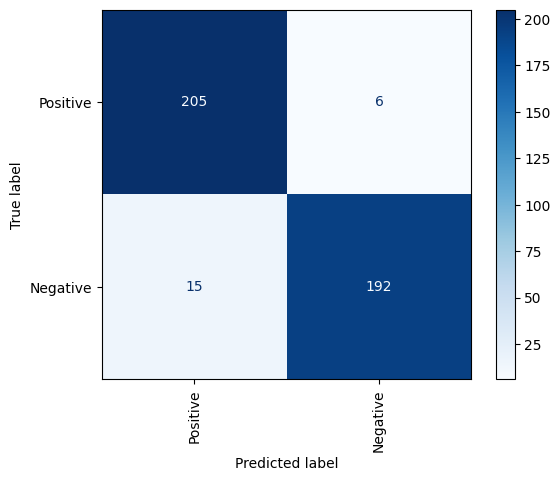

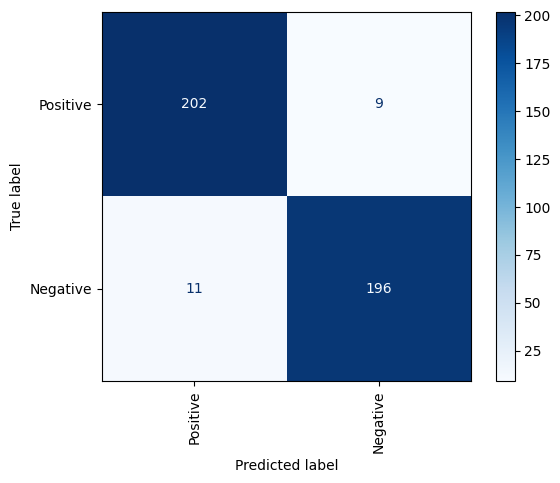

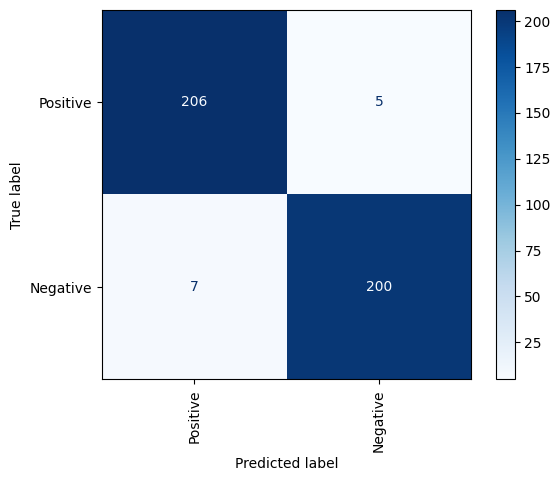

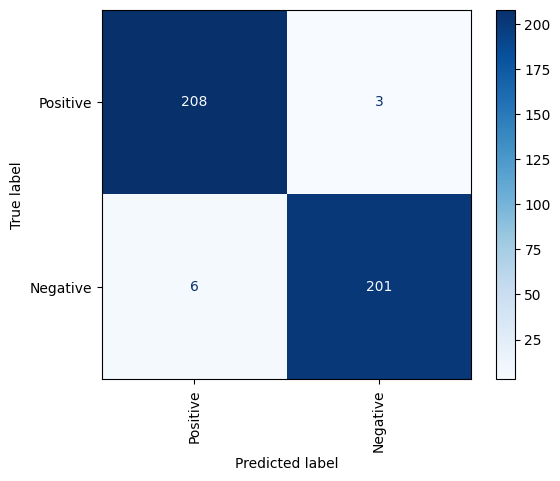

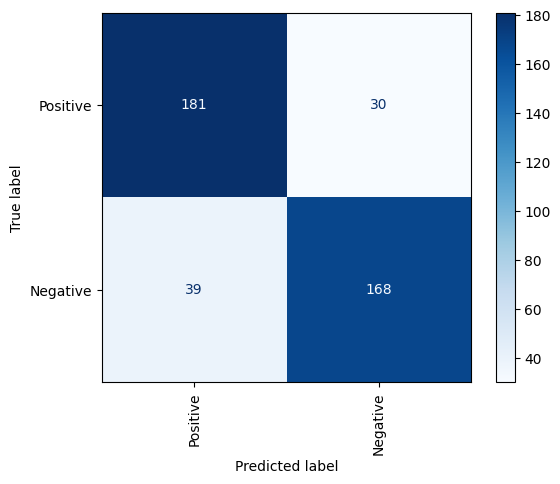

In [ ]:
# here you can try use the grid search to find the best model parameter(a example is in SVM model)
#-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*

Accuracy=[]

for i in range (5):

  if i == 0:
#(1)LR
      model = LogisticRegression(max_iter=1000, random_state=0)
      param_grid = {
          'C': [0.001, 0.01, 0.1, 1, 10, 100],
     }

  if i ==1:
#(2)KNN
      model=KNeighborsClassifier()
      param_grid = {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance']
      }

  if i ==2:
#(3)RF
    model = RandomForestClassifier(random_state=0)
    param_grid = {
      'n_estimators': [100, 200],
      'max_depth': [None, 10, 20, 30],
      'min_samples_split': [2, 5, 10],
      'min_samples_leaf': [1, 2, 4]
    }

  if i == 3:

#(4)XGBoost
    model =  XGBClassifier()
    param_grid = {
      'learning_rate': [0.01, 0.1, 0.2],
      'n_estimators': [100, 200],
      'max_depth': [3, 4, 5]
    }

  if i == 4:
#(6)Naïve Bayes models
    model=BernoulliNB()
    param_grid = {'alpha': [0.1, 0.5, 1],'force_alpha': [True,False]}


  if i == 5:

#(5)SVM
    model= SVC(probability=True)

# this is an example to use the grid search to find the best parameter for SVM model
# param_grid specifies the hyperparameter grid to search over： kernel types
# ('linear', 'rbf', 'poly') and regularization strength C values（0.1, 1, 10）.
    param_grid = {'kernel': ['linear', 'rbf', 'poly'],'C': [0.1, 1, 10]}

#`grid_search` performs a grid search with 5-fold cross-validation and evaluates models based on accuracy.
  grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

#`fit` method fits the model to the training data, systematically trying out all
# parameter combinations.
  grid_search.fit(x_train_vectorized, y_train)

#`best_params` and `best_score` store the best hyperparameters and their
# corresponding accuracy score.
  best_params = grid_search.best_params_
  print(best_params)
  best_score = grid_search.best_score_

#The `model` is updated with the best estimator found during the grid search,
# which can be used for further analysis.
  model = grid_search.best_estimator_



#-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*

  cmd.from_estimator(
      model,
      x_test_vectorized,
      y_test,
      display_labels=['Positive','Negative'],
      cmap='Blues',
      xticks_rotation='vertical'
      )

  Accuracy.append(accuracy_score(y_test,model.predict(x_test_vectorized)))


#calculate accuracy
  print('The accuracy of the model is: '+str(accuracy_score(y_test,model.predict(x_test_vectorized))))

Accuracy

TfidfVectorizer


{'C': 0.1}
The accuracy of the model is: 0.9545454545454546
{'n_neighbors': 5, 'weights': 'distance'}
The accuracy of the model is: 0.9090909090909091
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
The accuracy of the model is: 0.9712918660287081
{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100}
The accuracy of the model is: 0.9641148325358851
{'alpha': 1, 'force_alpha': True}
The accuracy of the model is: 0.9401913875598086
[0.9545454545454546,
 0.9090909090909091,
 0.9712918660287081,
 0.9641148325358851,
 0.9401913875598086]


Count vectorizer

 {'C': 1}
The accuracy of the model is: 0.937799043062201
{'n_neighbors': 5, 'weights': 'uniform'}
The accuracy of the model is: 0.9258373205741627
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
The accuracy of the model is: 0.9641148325358851
{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
The accuracy of the model is: 0.9497607655502392
{'alpha': 1, 'force_alpha': True}
The accuracy of the model is: 0.9425837320574163
[0.937799043062201,
 0.9258373205741627,
 0.9641148325358851,
 0.9497607655502392,
 0.9425837320574163]


HashingVectorizer

 {'C': 10}
The accuracy of the model is: 0.9497607655502392
{'n_neighbors': 9, 'weights': 'uniform'}
The accuracy of the model is: 0.9521531100478469
{'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
The accuracy of the model is: 0.9712918660287081
{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
The accuracy of the model is: 0.9784688995215312
{'alpha': 1, 'force_alpha': True}
The accuracy of the model is: 0.8349282296650717
[0.9497607655502392,
 0.9521531100478469,
 0.9712918660287081,
 0.9784688995215312,
 0.8349282296650717]